## 处理其他行业的数据
整理整个处理的逻辑
- 处理数据
    - 去除ST
    - 更改列名
    - 去除全为空的列
    - 去除不连续的公司
    - 导出数据，roeData.xlsx
    - winsorize
    - 导出数据，winsorized.xlsx
- 计算行业标准差，取得波动大于行业标准差的公司，roeStd，导出数据，
- 从roeStd中再根据规则筛选出good，规则如超过n个std的比例超过proportion
- 对good进行mark，导出mark数据

In [1]:
import sys
sys.path.append("..")

In [2]:
import roeProcessTools as tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.signal as signal
from random import sample

In [3]:
dirPath = "/Users/zch/Desktop/internship/data/"
chemPath = "化工roe.xlsx"
machPath = "机械设备roe.xlsx"
elecPath = "电子roe.xlsx"
foodPath = "食品饮料roe.xlsx"

In [4]:
chemRoe = pd.read_excel(dirPath+chemPath)
#  data = preProcess(data, startYear=2000, endYear=2021)
#     if export:
#         data.to_excel(f"{dirPath}roeData.xlsx", index=False)
#     data = removeLessThan(data, minNum=40)
#     if export:
#         data.to_excel(f"{dirPath}预处理暂存.xlsx", index=False)
#     data = winsorize(data, winsorize=True)
#     if export:
#         data.to_excel(f"{dirPath}winsorized.xlsx", index=False)
#     # 比行业均值大的
#     data = greaterThanStd(data, n=8, gaussian=True, center=True)
#     if export:
#         data.to_excel(f"{dirPath}gStd.xlsx", index=False)
#     # 选择具有周期性波动的公司
#     selected = selectGood(data, n=1.5, minExtreme=4, proportion=0.2) 
#     print("共筛选出%d个公司"%len(selected))
#     if export:
#         selected.to_excel(f"{dirPath}selected.xlsx", index=False)
#     marked = markCompanies(selected)
#     if export:
#         marked.to_excel(f"{dirPath}marked.xlsx", index=False)
len(chemRoe)

395

In [5]:
chemRoe = tools.clean(chemRoe)
len(chemRoe)

156

In [6]:
chemRoe.head()

,code,name,2000-12,2001-03,2001-06,2001-09,2001-12,2002-03,2002-06,2002-09,...,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
0,000059.SZ,华锦股份,NaN,NaN,NaN,0.2600,-0.1924,0.2154,0.5451,-0.58250,...,3.5560,2.26990,-0.0284,2.5835,1.43870,2.8470,0.5103,-5.0940,1.72490,3.9107
1,000096.SZ,广聚能源,NaN,NaN,NaN,NaN,NaN,1.9954,2.2516,1.97330,...,2.7503,0.63060,0.4704,0.4159,1.00920,2.7707,0.7215,0.0677,0.94640,3.3680
2,000159.SZ,国际实业,NaN,NaN,NaN,0.9284,3.0246,0.2253,0.2197,-1.57466,...,-1.1967,3.16780,1.5499,1.0988,-0.56680,-1.0599,1.9216,-1.2682,4.31010,-0.1345
3,000301.SZ,东方盛虹,NaN,NaN,NaN,1.8798,2.0269,1.4324,2.0077,1.52400,...,1.0266,-0.20786,1.5276,2.4191,3.12772,2.9561,3.0949,1.3506,-0.20786,0.9960
5,000420.SZ,吉林化纤,NaN,NaN,NaN,NaN,NaN,0.2867,1.2641,0.03650,...,2.4156,1.70320,0.1512,0.6440,1.75080,0.3671,0.3048,0.5129,-3.25480,-4.4926


 ## 代码示例
 ```python
 # 比行业均值大的
data = greaterThanStd(data, n=8, gaussian=True, center=True)
if export:
    data.to_excel(f"{dirPath}gStd.xlsx", index=False)
# 选择具有周期性波动的公司
selected = selectGood(data, n=1.5, minExtreme=4, proportion=0.2) 
print("共筛选出%d个公司"%len(selected))
if export:
    selected.to_excel(f"{dirPath}selected.xlsx", index=False)
marked = markCompanies(selected)
if export:
    marked.to_excel(f"{dirPath}marked.xlsx", index=False)
```

In [9]:
chemRoe.to_excel(dirPath+"chemRoeClean.xlsx", index=False)

In [10]:
chemRoe = tools.greaterThanStd(chemRoe, n=8, gaussian=True, center=True)

In [12]:
selected = tools.selectGood(chemRoe, n=1.5, minExtreme=4, proportion=0.2)

In [14]:
marked = tools.markCompanies(selected)

In [15]:
marked.to_excel(dirPath+"chemMarked.xlsx", index=False)

000059.SZ
000420.SZ
000510.SZ
000553.SZ
000683.SZ
000703.SZ
000731.SZ
000822.SZ
000893.SZ
000902.SZ
002002.SZ
002037.SZ
002064.SZ
002109.SZ
002125.SZ
002136.SZ
002172.SZ
002211.SZ
002226.SZ
002493.SZ
200553.SZ
300107.SZ
300132.SZ
600075.SH
600143.SH
600160.SH
600230.SH
600256.SH
600273.SH
600299.SH
600309.SH
600315.SH
600346.SH
600389.SH
600596.SH
600688.SH
600844.SH
900921.SH


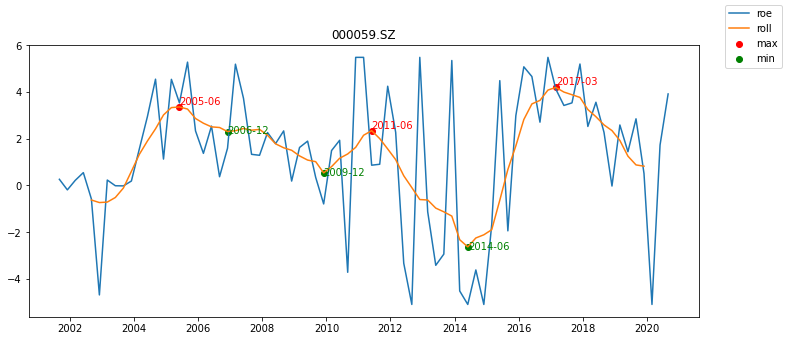

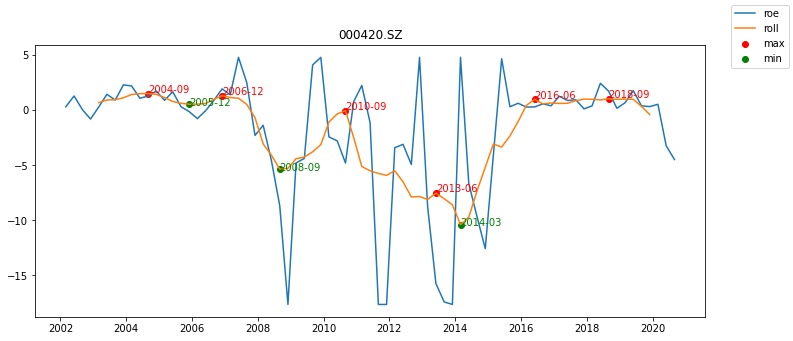

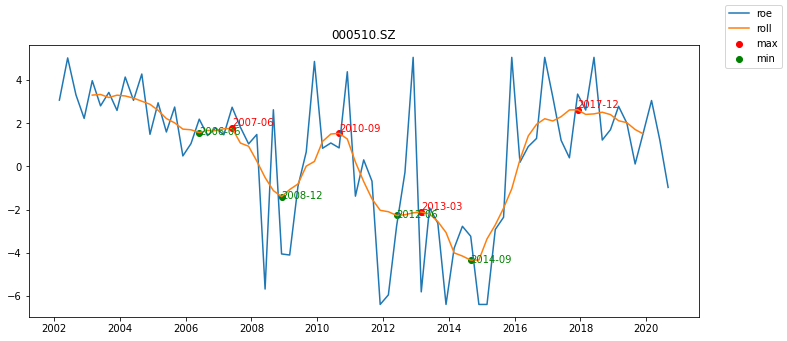

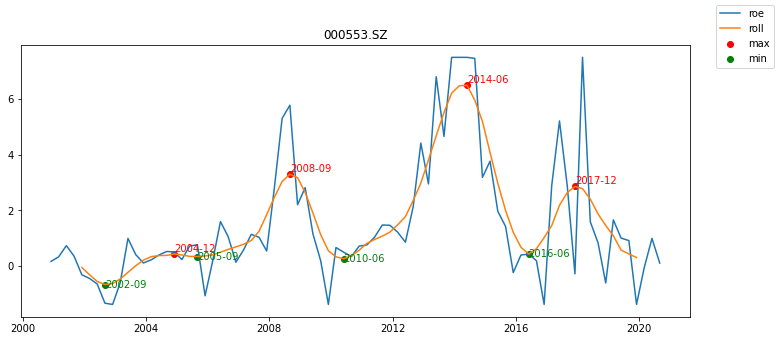

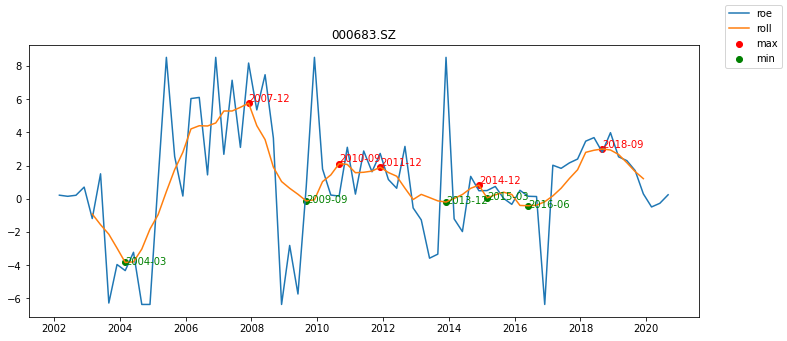

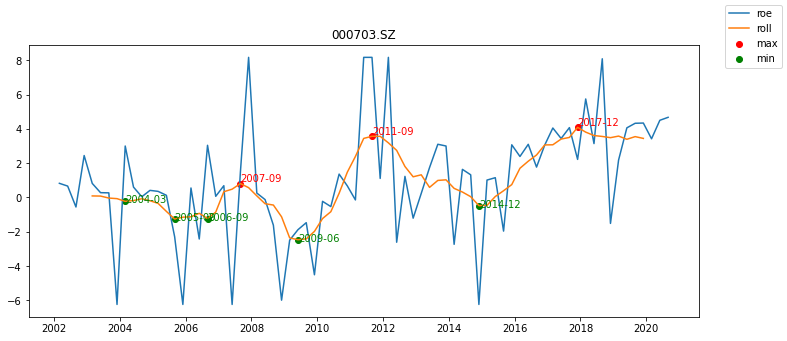

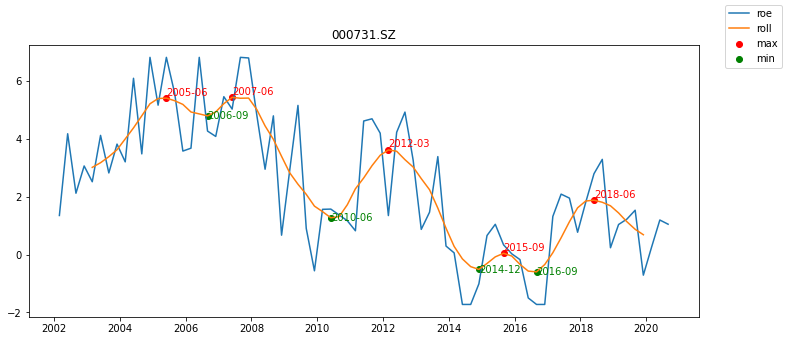

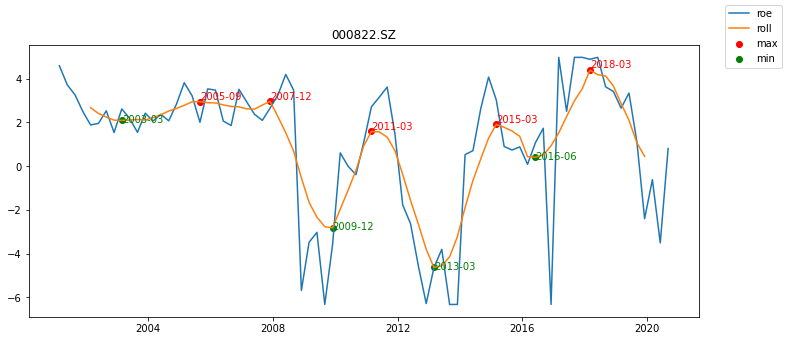

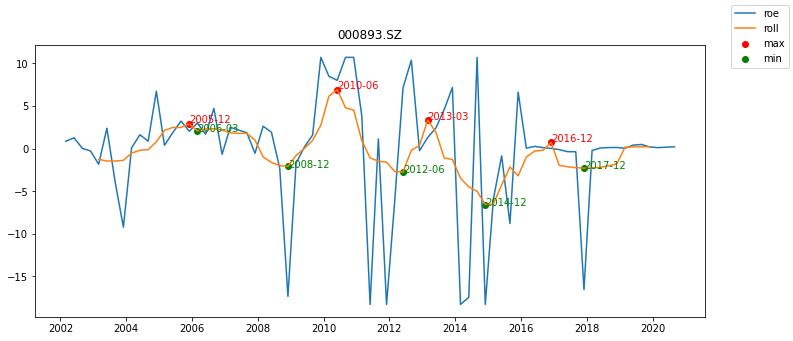

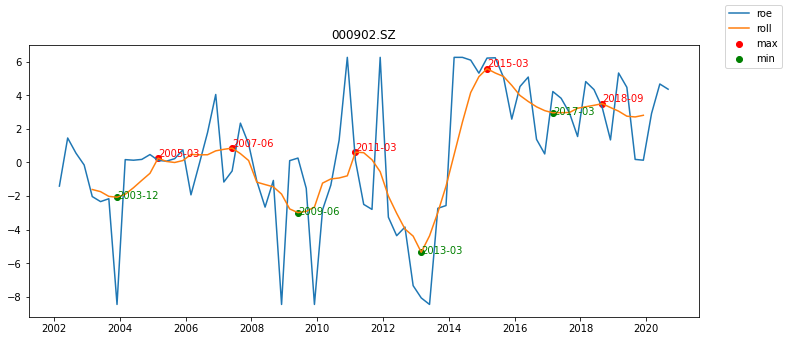

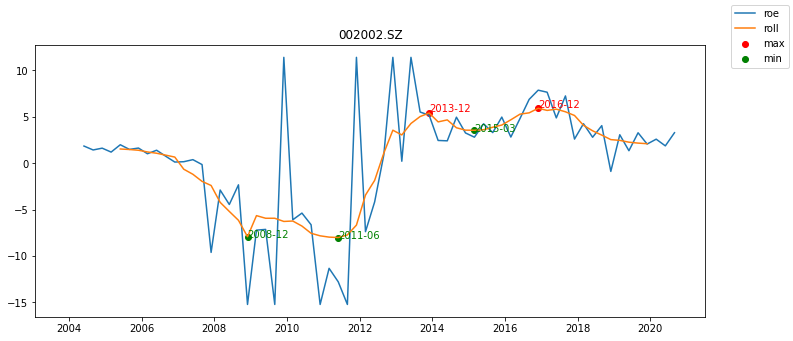

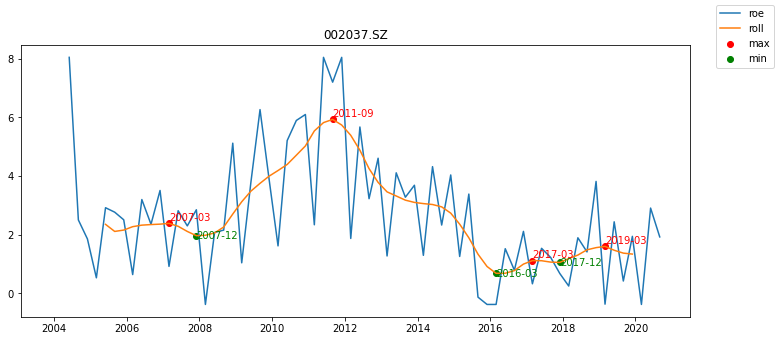

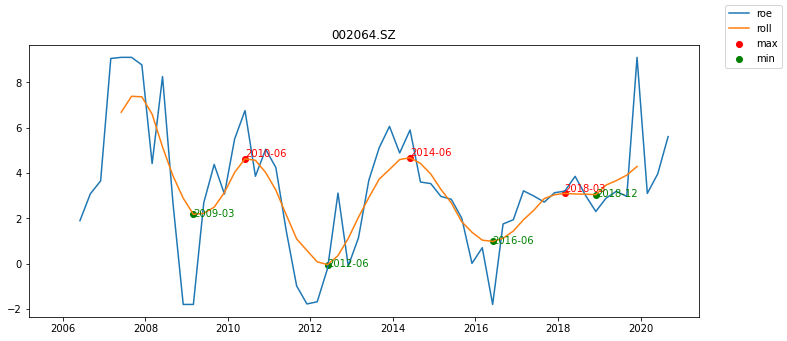

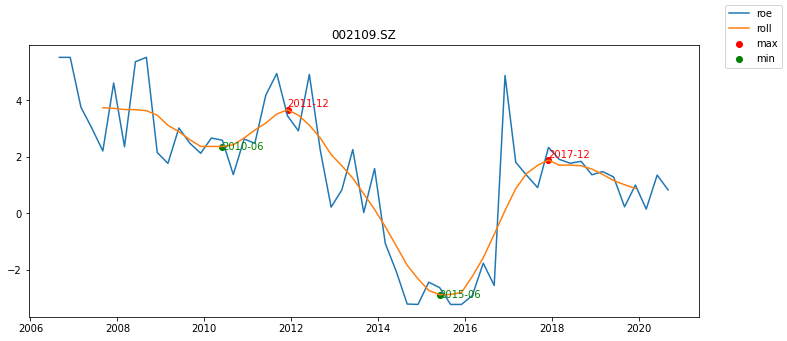

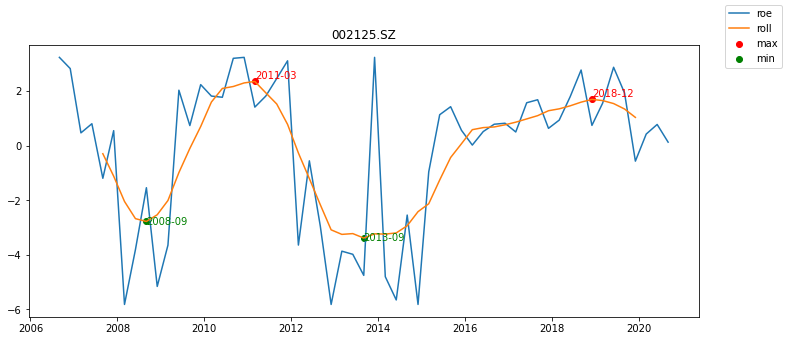

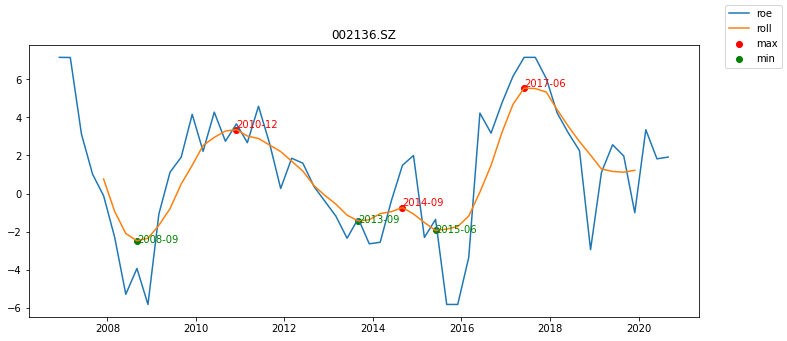

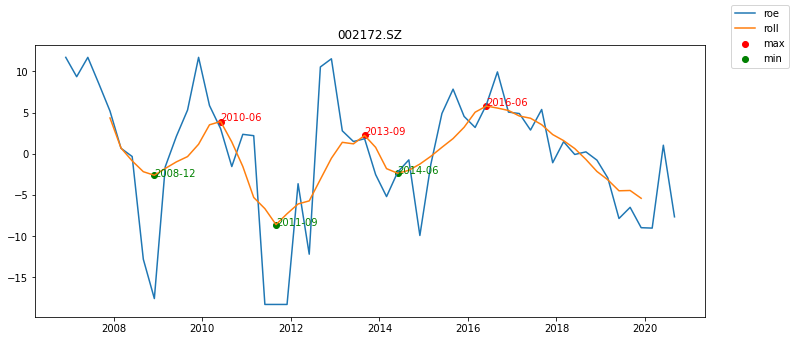

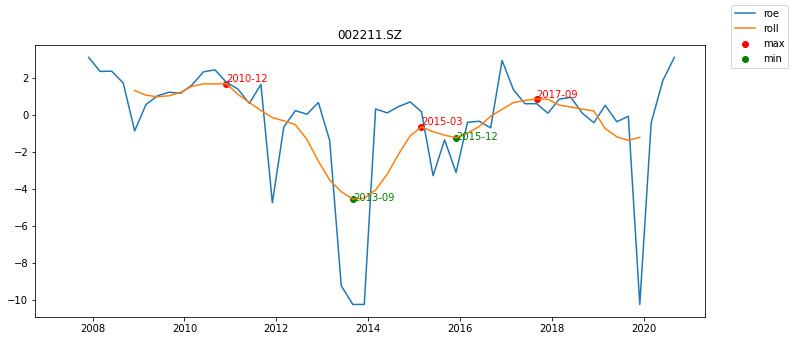

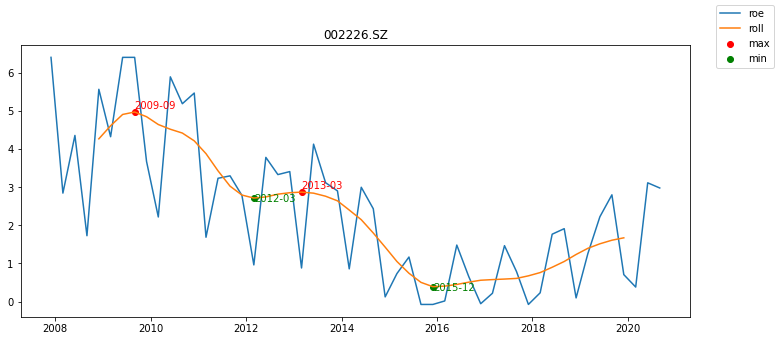

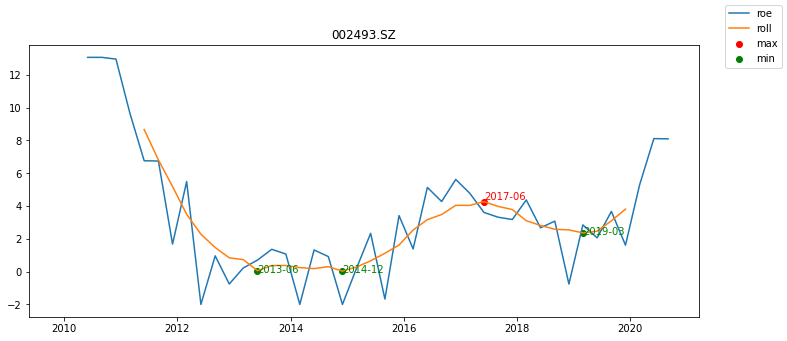

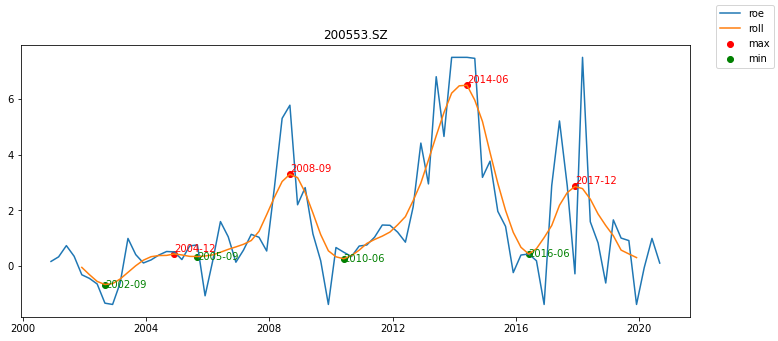

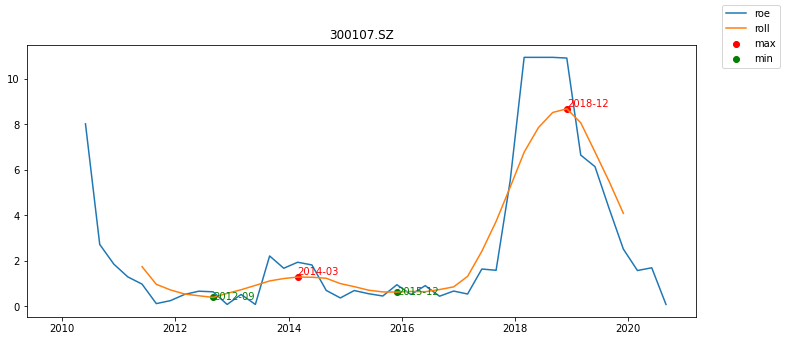

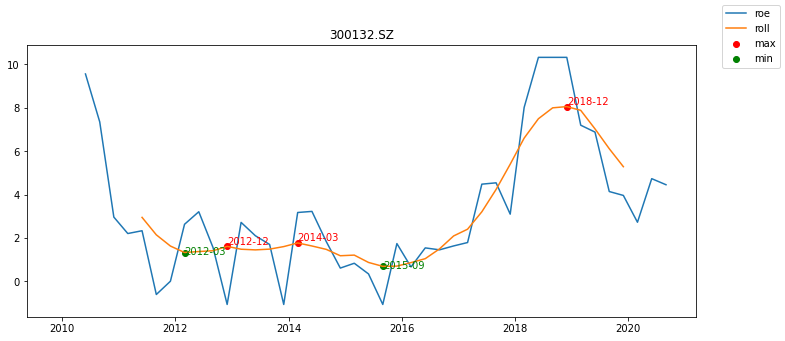

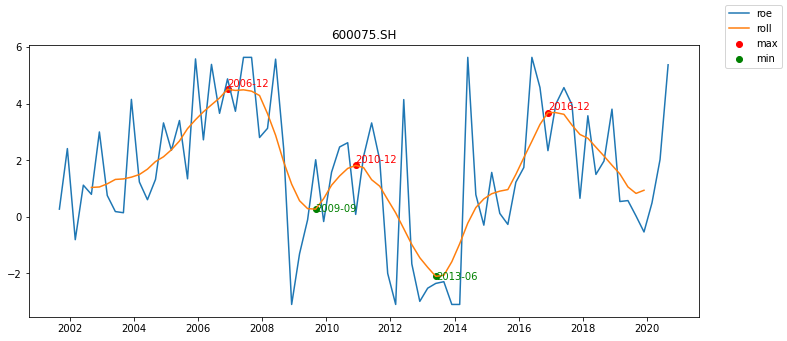

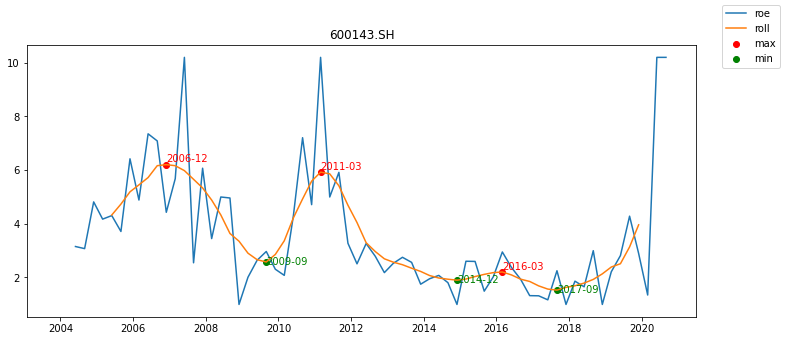

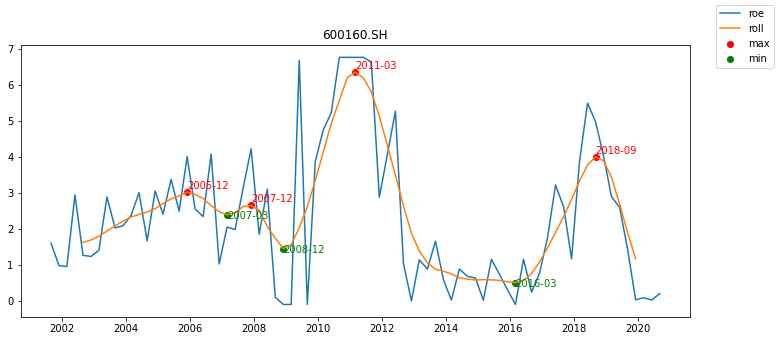

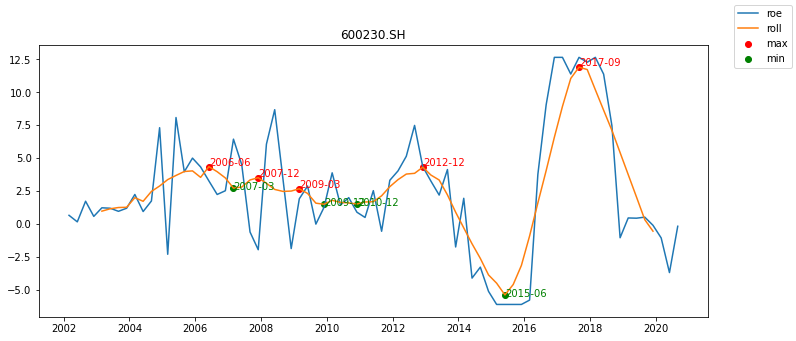

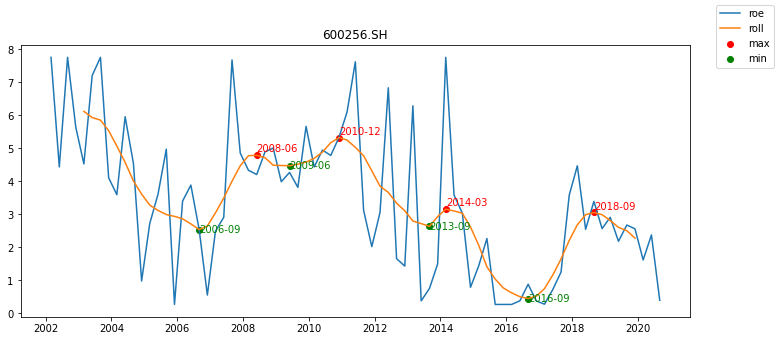

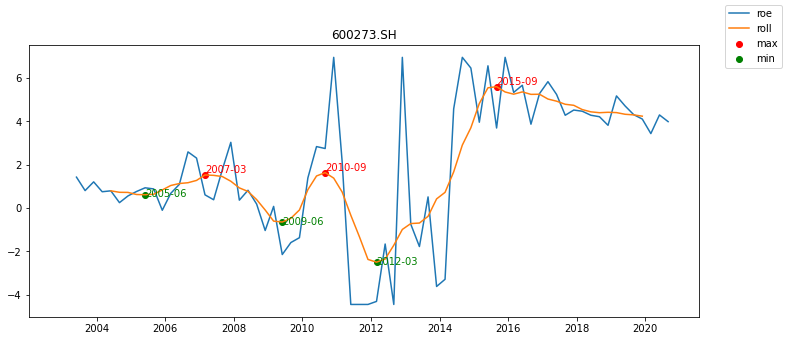

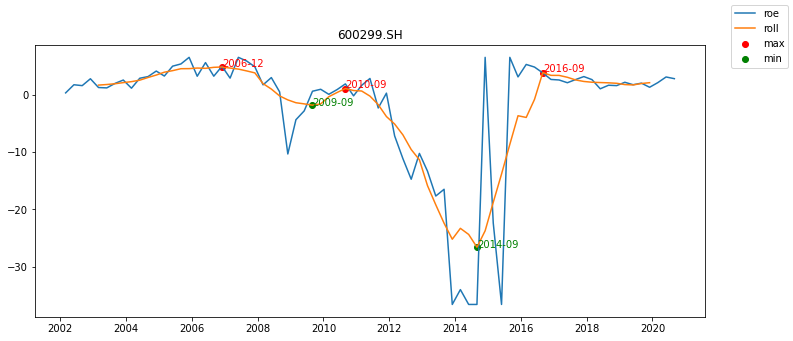

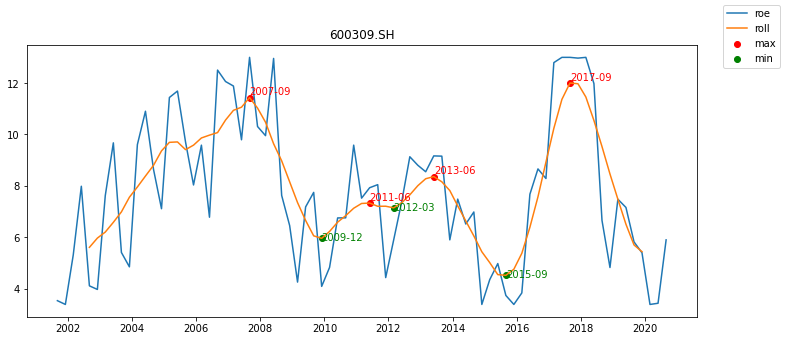

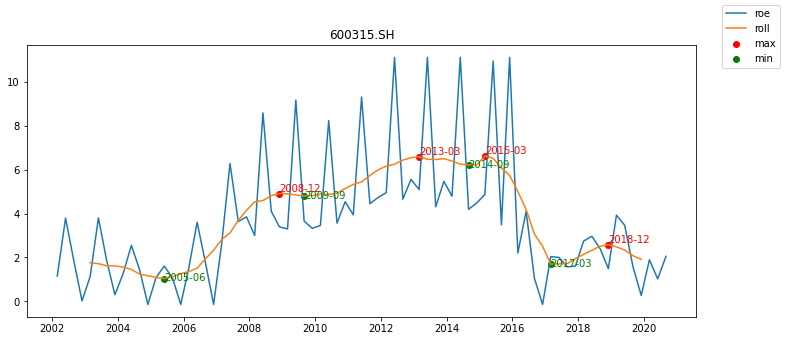

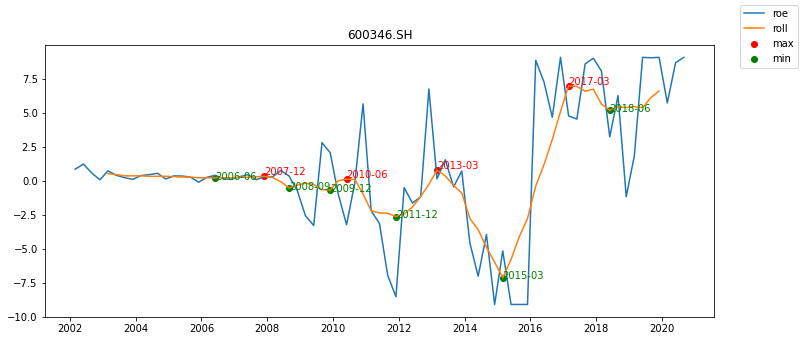

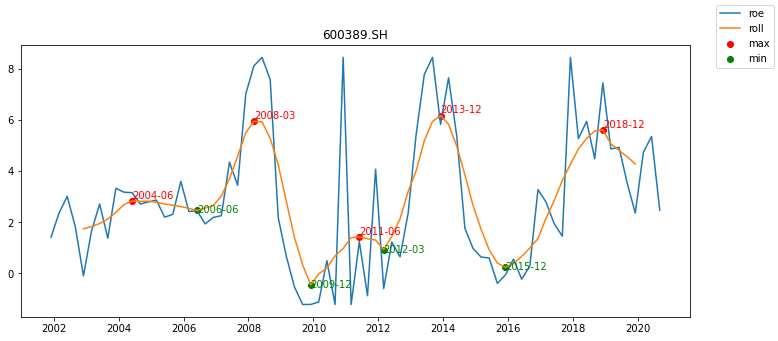

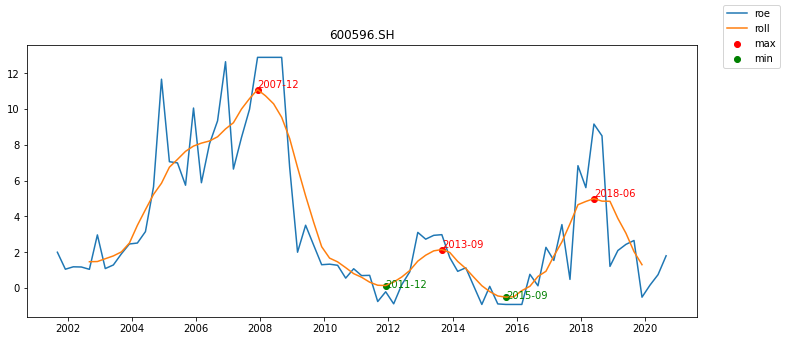

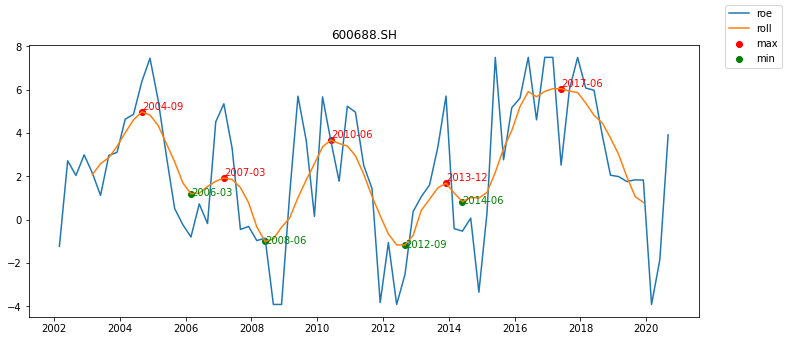

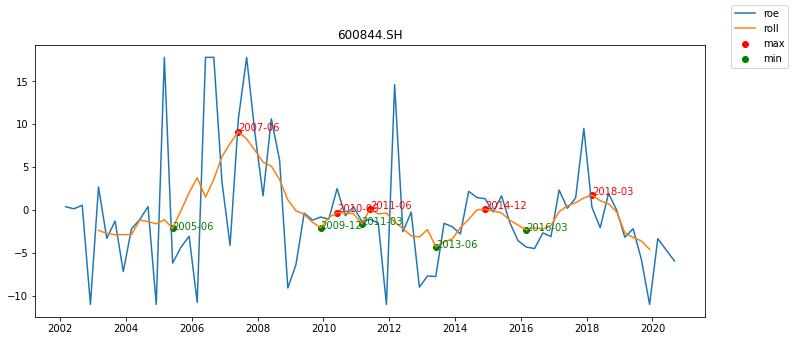

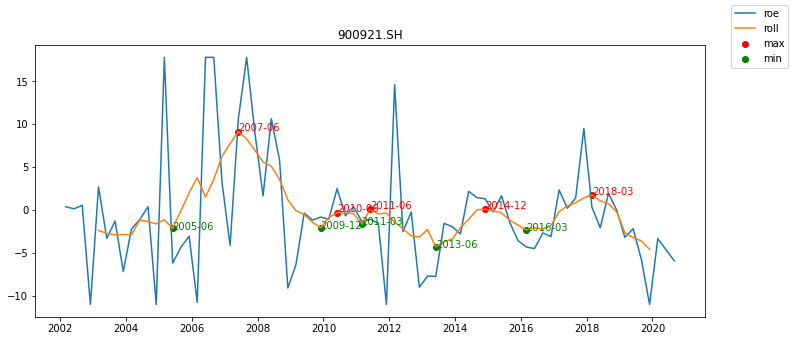

In [38]:
for code in selected.code.values:
    print(code)
    tools.showOne(code, selected)

In [25]:
y = selected.iloc[0, 2:][:20]

In [35]:
yRolling = y.rolling(8, center=True).mean()

In [36]:
yRolling

2000-12         NaN
2001-03         NaN
2001-06         NaN
2001-09         NaN
2001-12         NaN
2002-03         NaN
2002-06         NaN
2002-09   -0.528650
2002-12   -0.563925
2003-03   -0.516575
2003-06   -0.347763
2003-09   -0.047250
2003-12    0.593387
2004-03    1.319900
2004-06    1.858375
2004-09    2.301538
2004-12    2.963325
2005-03         NaN
2005-06         NaN
2005-09         NaN
Name: 0, dtype: float64

In [31]:
y

2000-12       NaN
2001-03       NaN
2001-06       NaN
2001-09    0.2600
2001-12   -0.1924
2002-03    0.2154
2002-06    0.5451
2002-09   -0.5825
2002-12   -4.6868
2003-03    0.2283
2003-06   -0.0163
2003-09   -0.0222
2003-12    0.1864
2004-03    1.5659
2004-06    2.9492
2004-09    4.5426
2004-12    1.1253
2005-03    4.5361
2005-06    3.5290
2005-09    5.2721
Name: 0, dtype: object

In [37]:
np.average(y[3:11])

-0.5286500000000001